In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
%matplotlib inline

In [4]:
from sklearn.metrics import accuracy_score,mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.preprocessing import LabelEncoder

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [9]:
#Import dataset from sklearn package
#from sklearn.datasets import load_iris
#df=load_iris()

In [10]:
#Import dataset externally 
df=pd.read_csv('/Users/alfia/Desktop/Iris/iris.csv')
df.head(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


# EDA

In [12]:
#Check if there any null values
df.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [13]:
#Check the shape of the dataset
df.shape

(150, 5)

In [14]:
#Check the data type of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [17]:
#Let's check the types and their corresponding number of records
#in the 'variety' column

In [18]:
df.variety.unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [19]:
df.variety.value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64

In [20]:
#Descriptive statistics
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [23]:
#Univariate Analysis

In [24]:
#Lets split the records based on the variety column

In [27]:
setosa = df.loc[df.variety == "Setosa"]
versicolor = df.loc[df.variety == "Versicolor"]
virginica = df.loc[df.variety == "Virginica"]

In [29]:
setosa.shape, versicolor.shape, virginica.shape

((50, 5), (50, 5), (50, 5))

In [33]:
df.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [34]:
#Sepal_length

In [60]:
sepal_length={
    'Setosa mean':np.mean(setosa['sepal.length']),
    'versicolor mean':np.mean(versicolor['sepal.length']),
    'virginica mean':np.mean(virginica['sepal.length']),
    
    'Setosa variance':np.var(setosa['sepal.length']),
    'versicolor variance':np.var(versicolor['sepal.length']),
    'virginica variance':np.var(virginica['sepal.length']),
    
    'Setosa std':np.std(setosa['sepal.length']),
    'versicolor std':np.std(versicolor['sepal.length']),
    'virginica std':np.std(virginica['sepal.length']),
     
    'Setosa median':np.median(setosa['sepal.length']),
    'versicolor median':np.median(versicolor['sepal.length']),
    'virginica median':np.median(virginica['sepal.length'])
}

In [61]:
sepal_length

{'Setosa mean': 5.005999999999999,
 'versicolor mean': 5.936,
 'virginica mean': 6.587999999999998,
 'Setosa variance': 0.12176399999999993,
 'versicolor variance': 0.2611040000000001,
 'virginica variance': 0.39625599999999994,
 'Setosa std': 0.348946987377739,
 'versicolor std': 0.5109833656783752,
 'virginica std': 0.6294886813914925,
 'Setosa median': 5.0,
 'versicolor median': 5.9,
 'virginica median': 6.5}

In [62]:
#Sepal_width

In [63]:
sepal_width={
    'Setosa mean':np.mean(setosa['sepal.width']),
    'versicolor mean':np.mean(versicolor['sepal.width']),
    'virginica mean':np.mean(virginica['sepal.width']),
    
    'Setosa variance':np.var(setosa['sepal.width']),
    'versicolor variance':np.var(versicolor['sepal.width']),
    'virginica variance':np.var(virginica['sepal.width']),
    
    'Setosa std':np.std(setosa['sepal.width']),
    'versicolor std':np.std(versicolor['sepal.width']),
    'virginica std':np.std(virginica['sepal.width']),
    
    'Setosa median':np.median(setosa['sepal.length']),
    'versicolor median':np.median(versicolor['sepal.length']),
    'virginica median':np.median(virginica['sepal.length'])
}

In [64]:
sepal_width

{'Setosa mean': 3.428000000000001,
 'versicolor mean': 2.7700000000000005,
 'virginica mean': 2.9739999999999998,
 'Setosa variance': 0.14081599999999997,
 'versicolor variance': 0.09650000000000002,
 'virginica variance': 0.10192400000000007,
 'Setosa std': 0.3752545802518604,
 'versicolor std': 0.31064449134018135,
 'virginica std': 0.319255383666431,
 'Setosa median': 5.0,
 'versicolor median': 5.9,
 'virginica median': 6.5}

In [65]:
#Petal_length

In [66]:
petal_length={
    'Setosa mean':np.mean(setosa['petal.length']),
    'versicolor mean':np.mean(versicolor['petal.length']),
    'virginica mean':np.mean(virginica['petal.length']),
    
    'Setosa variance':np.var(setosa['petal.length']),
    'versicolor variance':np.var(versicolor['petal.length']),
    'virginica variance':np.var(virginica['petal.length']),
    
    'Setosa std':np.std(setosa['petal.length']),
    'versicolor std':np.std(versicolor['petal.length']),
    'virginica std':np.std(virginica['petal.length']),
    
    'Setosa median':np.median(setosa['sepal.length']),
    'versicolor median':np.median(versicolor['sepal.length']),
    'virginica median':np.median(virginica['sepal.length'])
}

In [67]:
petal_length

{'Setosa mean': 1.4620000000000002,
 'versicolor mean': 4.26,
 'virginica mean': 5.552,
 'Setosa variance': 0.02955600000000001,
 'versicolor variance': 0.21640000000000012,
 'virginica variance': 0.2984960000000002,
 'Setosa std': 0.17191858538273286,
 'versicolor std': 0.4651881339845204,
 'virginica std': 0.5463478745268441,
 'Setosa median': 5.0,
 'versicolor median': 5.9,
 'virginica median': 6.5}

In [68]:
#Petal_width

In [69]:
petal_width={
    'Setosa mean':np.mean(setosa['petal.width']),
    'versicolor mean':np.mean(versicolor['petal.width']),
    'virginica mean':np.mean(virginica['petal.width']),
    
    'Setosa variance':np.var(setosa['petal.width']),
    'versicolor variance':np.var(versicolor['petal.width']),
    'virginica variance':np.var(virginica['petal.width']),
    
    'Setosa std':np.std(setosa['petal.width']),
    'versicolor std':np.std(versicolor['petal.width']),
    'virginica std':np.std(virginica['petal.width']),
    
    'Setosa median':np.median(setosa['sepal.length']),
    'versicolor median':np.median(versicolor['sepal.length']),
    'virginica median':np.median(virginica['sepal.length'])
}

In [70]:
petal_length

{'Setosa mean': 1.4620000000000002,
 'versicolor mean': 4.26,
 'virginica mean': 5.552,
 'Setosa variance': 0.02955600000000001,
 'versicolor variance': 0.21640000000000012,
 'virginica variance': 0.2984960000000002,
 'Setosa std': 0.17191858538273286,
 'versicolor std': 0.4651881339845204,
 'virginica std': 0.5463478745268441,
 'Setosa median': 5.0,
 'versicolor median': 5.9,
 'virginica median': 6.5}

In [71]:
#Relationship between the Sepal length and width

In [72]:
df.head(1)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa


Text(0.5, 1.0, 'Sepal Length Vs Sepal Width')

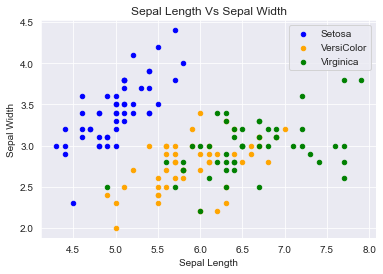

In [75]:
ax = df[df.variety=='Setosa'].plot.scatter(x='sepal.length',
                                           y='sepal.width',
                                           color='blue',
                                           label='Setosa')
df[df.variety=='Versicolor'].plot.scatter(x='sepal.length',
                                          y='sepal.width',
                                          color='orange',
                                          label='VersiColor',ax=ax)

df[df.variety=='Virginica'].plot.scatter(x='sepal.length',
                                         y='sepal.width',
                                         color='green',
                                         label='Virginica', ax=ax)
ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal Width")
ax.set_title("Sepal Length Vs Sepal Width")

In [ ]:
g = sns.FacetGrid(tips, col="time")
g.map(sns.histplot, "tip")

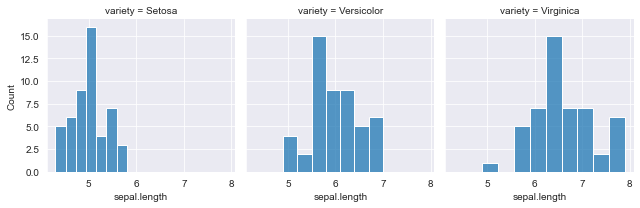

In [81]:
g = sns.FacetGrid(df, col='variety')
g.map(sns.histplot,"sepal.length")

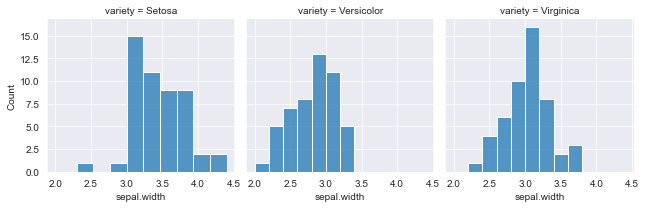

In [84]:
h = sns.FacetGrid(df, col='variety')
h.map(sns.histplot,"sepal.width",)

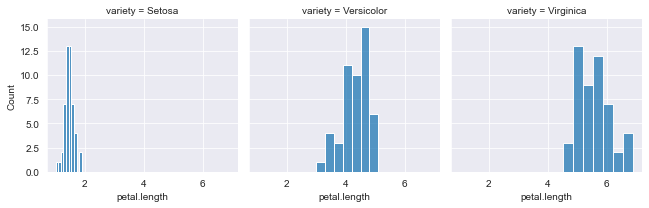

In [85]:
i = sns.FacetGrid(df, col='variety')
i.map(sns.histplot,"petal.length")

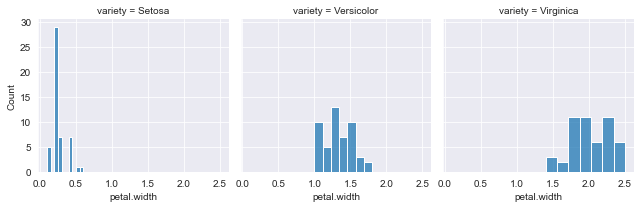

In [86]:
j = sns.FacetGrid(df, col='variety')
j.map(sns.histplot,"petal.width")

In [99]:
counts,bi=np.histogram(setosa['petal.length'],bins=10,density=True)

In [102]:
pdf = counts/sum(counts)
print("PDF: ", pdf)
print("CDF: ", bi)

PDF:  [0.02 0.02 0.04 0.14 0.26 0.26 0.14 0.08 0.   0.04]
CDF:  [1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


In [106]:
cdf = np.cumsum(pdf)
cdf

array([0.02, 0.04, 0.08, 0.22, 0.48, 0.74, 0.88, 0.96, 0.96, 1.  ])

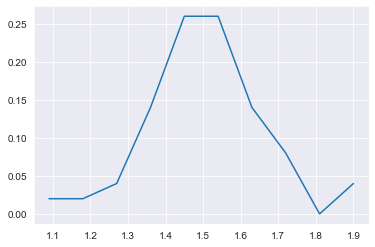

In [108]:
plt.plot(bi[1:], pdf)

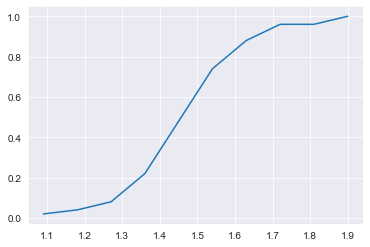

In [109]:
plt.plot(bi[1:], cdf)

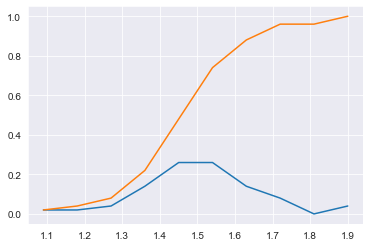

In [117]:
counts_pl,bi_pl=np.histogram(setosa['petal.length'],
                             bins=10,density=True)
pdf_pl = counts_pl/sum(counts_pl)
cdf_pl = np.cumsum(pdf_pl)
plt.plot(bi_pl[1:], pdf_pl)
plt.plot(bi_pl[1:], cdf_pl)

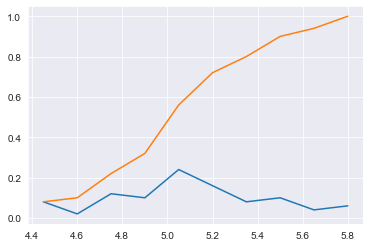

In [118]:
counts_sl,bi_sl=np.histogram(setosa['sepal.length'],
                             bins=10,density=True)
pdf_sl = counts_sl/sum(counts_sl)
cdf_sl = np.cumsum(pdf_sl)
plt.plot(bi_sl[1:], pdf_sl)
plt.plot(bi_sl[1:], cdf_sl)

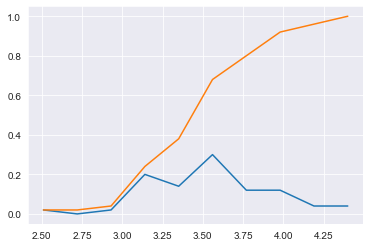

In [120]:
counts_sw,bi_sw=np.histogram(setosa['sepal.width'],
                             bins=10,density=True)
pdf_sw = counts_sw/sum(counts_sw)
cdf_sw = np.cumsum(pdf_sw)
plt.plot(bi_sw[1:], pdf_sw)
plt.plot(bi_sw[1:], cdf_sw)

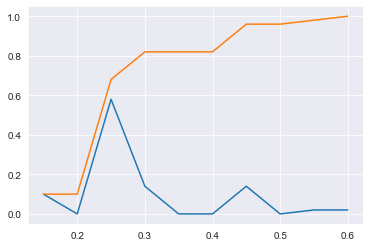

In [121]:
counts_pw,bi_pw=np.histogram(setosa['petal.width'],
                             bins=10,density=True)
pdf_pw = counts_pw/sum(counts_pw)
cdf_pw = np.cumsum(pdf_pw)
plt.plot(bi_pw[1:], pdf_pw)
plt.plot(bi_pw[1:], cdf_pw)

In [131]:
#Let's check outliers

<AxesSubplot:xlabel='sepal.length'>

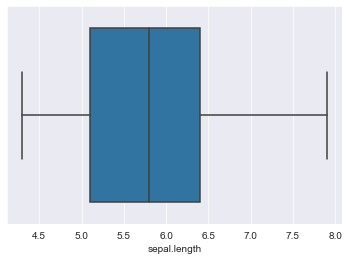

In [132]:
sns.boxplot(x='sepal.length', data=df)

<AxesSubplot:xlabel='petal.length'>

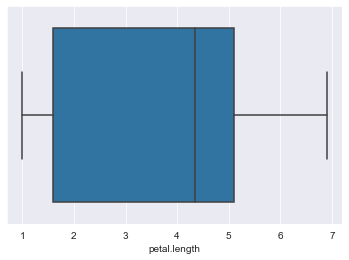

In [133]:
sns.boxplot(x='petal.length', data=df)

<AxesSubplot:xlabel='petal.width'>

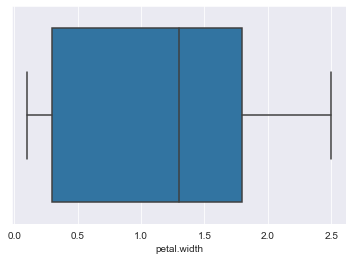

In [134]:
sns.boxplot(x='petal.width', data=df)

<AxesSubplot:xlabel='sepal.width'>

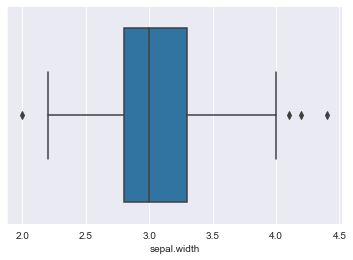

In [135]:
sns.boxplot(x='sepal.width', data=df)

In [137]:
#Only Sepal Width has some outlier, let's repair it using IQR

In [138]:
Q1 = np.percentile(df['sepal.width'], 25,
                interpolation = 'midpoint')  
Q3 = np.percentile(df['sepal.width'], 75,
                interpolation = 'midpoint')
IQR = Q3 - Q1
upper = np.where(df['sepal.width'] >= (Q3+1.5*IQR)) 
lower = np.where(df['sepal.width'] <= (Q1-1.5*IQR))  
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

<AxesSubplot:xlabel='sepal.width'>

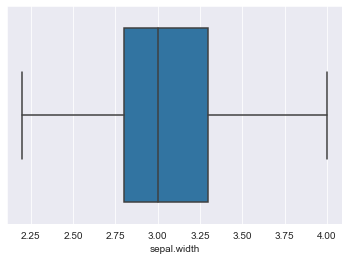

In [139]:
#After removing outliers
sns.boxplot(x='sepal.width', data=df)

In [140]:
#Bivariate Analysis

<AxesSubplot:>

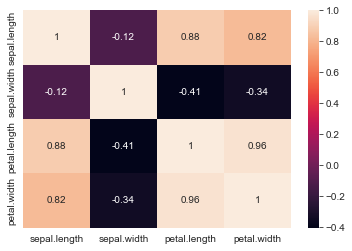

In [147]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(),annot=True)

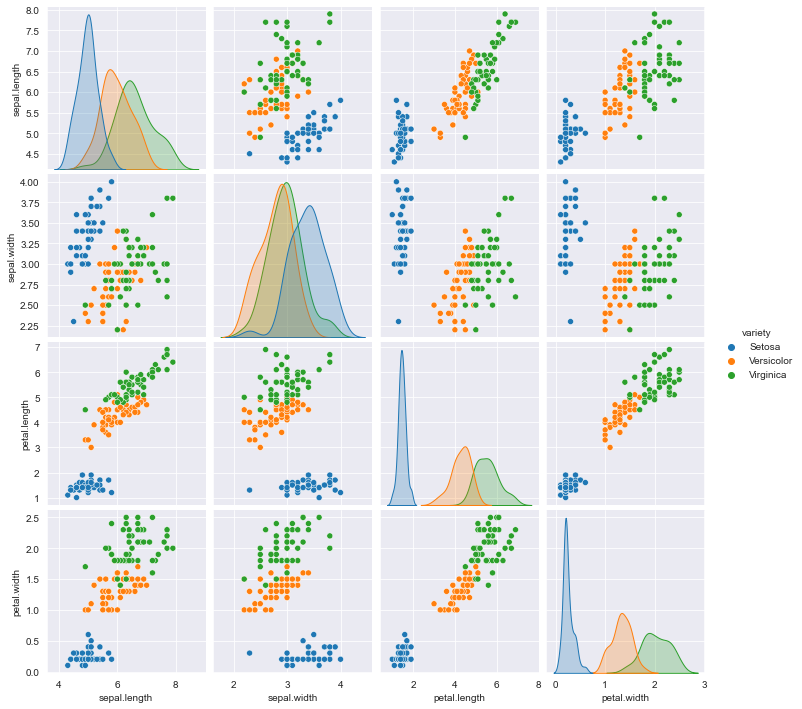

In [149]:
sns.pairplot(df, hue='variety',)

In [150]:
#Checking for skewness

<AxesSubplot:xlabel='sepal.length', ylabel='Density'>

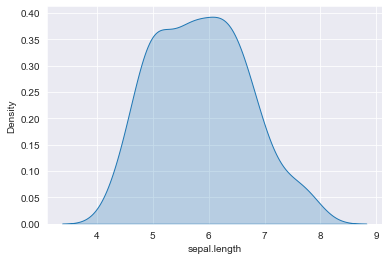

In [157]:
sns.distplot(df['sepal.length'],
             hist=False,kde_kws = {'shade': True})

<AxesSubplot:xlabel='sepal.width', ylabel='Density'>

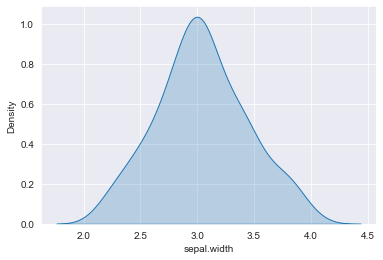

In [158]:
sns.distplot(df['sepal.width'],
             hist=False,kde_kws = {'shade': True})

<AxesSubplot:xlabel='petal.length', ylabel='Density'>

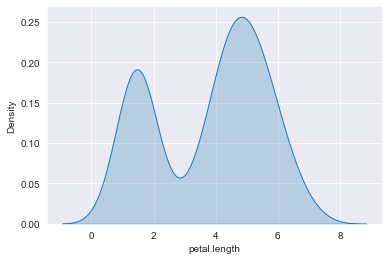

In [159]:
sns.distplot(df['petal.length'],
             hist=False,kde_kws = {'shade': True})

<AxesSubplot:xlabel='petal.width', ylabel='Density'>

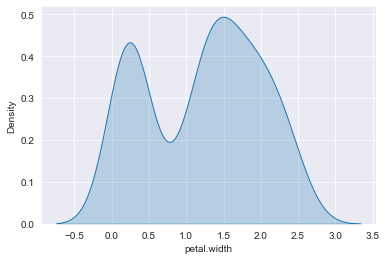

In [160]:
sns.distplot(df['petal.width'],
             hist=False,kde_kws = {'shade': True})

In [161]:
#There is no skewness in the dataset

In [162]:
#Label Encoding

In [169]:
le_species = LabelEncoder()
df['species']=le_species.fit_transform(df['variety'])

In [170]:
df.drop('variety',axis=1,inplace=True)

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  146 non-null    float64
 1   sepal.width   146 non-null    float64
 2   petal.length  146 non-null    float64
 3   petal.width   146 non-null    float64
 4   species       146 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.8 KB


In [172]:
#Here 0 is Setosa, 1 is Versicolor , 2 is Virginica

In [173]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [194]:
x=df.drop('species',axis=1)
y=df.species

In [195]:
x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                 test_size=0.2,
                                                 random_state=0)

In [196]:
x_train.shape, x_test.shape

((116, 4), (30, 4))

In [197]:
svm = SVC(probability=True)
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)
y_prob = svm.predict_proba(x_test)[:,1]
acc = accuracy_score(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)

model = svm
cvs = cross_val_score(model,x,y,cv=10)
print("Accuracy Score : ", acc)
print("R2 Score : ", r2)
print("Mean Score Error Score : ", mse)
print("Rooted Mean Score Error Score : ", rmse)
print("Mean Absolute Error Score :", mae)
print(" ")
print("Confusion Matrix Score:\n", cm)
print(" ")
print("Classification Report Score:\n", cr)
print("Cross Validation Score Score:\n", cvs)
print(" ")
print("Cross Validation Mean:\n", cvs.mean())
Cross_Validation_Mean.append(cvs.mean())

Accuracy Score :  1.0
R2 Score :  1.0
Mean Score Error Score :  0.0
Rooted Mean Score Error Score :  0.0
Mean Absolute Error Score : 0.0
 
Confusion Matrix Score:
 [[11  0  0]
 [ 0 10  0]
 [ 0  0  9]]
 
Classification Report Score:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Cross Validation Score Score:
 [1.         0.93333333 1.         0.93333333 1.         0.86666667
 0.92857143 0.92857143 1.         1.        ]
 
Cross Validation Mean:
 0.959047619047619


In [198]:
x.head(5)

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [199]:
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [200]:
svm.predict([[4.7,3.2,1.3,0.2]])

array([0])